This notebook is a playbook and was not included in analysis.

In [3]:
import act
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt, dates
from datetime import datetime,time,timedelta
import pyart
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set your username and token here!
username = 'hseppala'
token = '2a895b89c1ac6335'

# Set the datastream and start/enddates
datastream = 'nsaxsaprcfrppiC1.a1'
startdate = '2020-10-06'
enddate = '2020-10-06'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] nsaxsaprcfrppiC1.a1.20201006.000448.nc
[DOWNLOADING] nsaxsaprcfrppiC1.a1.20201006.000659.nc

If you use these data to prepare a publication, please cite:

Feng, Y.-C., Lindenmaier, I., Nelson, D., Matthews, A., Wendler, T., Melo de
Castro, V., & Rocque, M. X-Band Scanning ARM Precipitation Radar (XSAPRCFRPPI).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1970125



In [25]:
radar = pyart.io.read(result[0])
radar

In [26]:
list(radar.fields)

['attenuation_corrected_differential_reflectivity',
 'attenuation_corrected_reflectivity_h',
 'cross_correlation_ratio_hv',
 'differential_phase',
 'differential_reflectivity',
 'mean_doppler_velocity',
 'normalized_coherent_power',
 'radar_echo_classification',
 'reflectivity',
 'reflectivity_enhanced',
 'reflectivity_v',
 'signal_to_noise_ratio',
 'specific_differential_phase',
 'spectral_width',
 'total_power',
 'total_power_enhanced',
 'total_power_v']

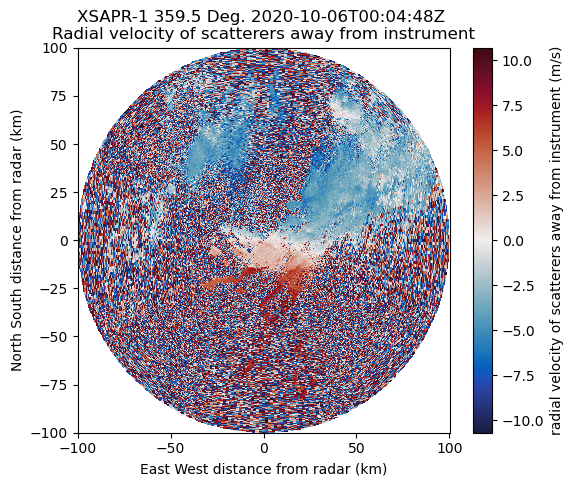

In [33]:
fig = plt.figure(figsize=[6,5])
display = pyart.graph.RadarDisplay(radar)
display.plot_ppi('mean_doppler_velocity',cmap='pyart_balance')

In [47]:
datastream = 'anxkasacrgridppiM1.c1'
startdate = '2020-03-13T12:00:00'
enddate = '2020-03-13T13:00:00'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_anx = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] anxkasacrgridppiM1.c1.20200313.120051.nc
[DOWNLOADING] anxkasacrgridppiM1.c1.20200313.123051.nc
[DOWNLOADING] anxkasacrgridppiM1.c1.20200313.121551.nc
[DOWNLOADING] anxkasacrgridppiM1.c1.20200313.124551.nc

If you use these data to prepare a publication, please cite:

Wang, M., Giangrande, S., & Johnson, K. Ka-Band Scanning ARM Cloud Radar PPI
scan, Cartesian Cloud Cover Grid VAP (KASACRGRIDPPI). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1886546



In [50]:
ds = xr.open_mfdataset(result_anx[0])
ds

<xarray.Dataset> Size: 328MB
Dimensions:                             (time: 4, bound: 2, Y: 1600, X: 1600,
                                         frequency: 1)
Coordinates:
  * time                                (time) datetime64[ns] 32B 2020-03-13T...
  * Y                                   (Y) float32 6kB -4e+04 ... 3.995e+04
  * X                                   (X) float32 6kB -4e+04 ... 3.995e+04
  * frequency                           (frequency) float32 4B 3.529e+10
Dimensions without coordinates: bound
Data variables: (12/15)
    base_time                           datetime64[ns] 8B ...
    time_offset                         (time) datetime64[ns] 32B dask.array<chunksize=(4,), meta=np.ndarray>
    time_bounds                         (time, bound) datetime64[ns] 64B dask.array<chunksize=(4, 2), meta=np.ndarray>
    co_to_crosspol_correlation_coeff    (time, Y, X) float32 41MB dask.array<chunksize=(1, 800, 1600), meta=np.ndarray>
    crosspolar_differential_phase       (time, Y, X) float32 41MB dask.array<chunksize=(1, 800, 1600), meta=np.ndarray>
    linear_depolarization_ratio_v       (time, Y, X) float32 41MB dask.array<chunksize=(1, 800, 1600), meta=np.ndarray>
    ...                                  ...
    signal_to_noise_ratio_crosspolar_v  (time, Y, X) float32 41MB dask.array<chunksize=(1, 800, 1600), meta=np.ndarray>
    spectral_width                      (time, Y, X) float32 41MB dask.array<chunksize=(1, 800, 1600), meta=np.ndarray>
    fixed_angle                         (time) float32 16B dask.array<chunksize=(4,), meta=np.ndarray>
    lat                                 float32 4B ...
    lon                                 float32 4B ...
    alt                                 float32 4B ...
Attributes: (12/16)
    command_line:          kasacrgridppi -s anx -f M1 -b 20200313 -D 1 -N -n ...
    Conventions:           ARM-1.3 CF/Radial-1.4 instrument_parameters radar_...
    process_version:       vap-kasacrgridppi-0.0-0.dev0.dirty.el7
    dod_version:           kasacrgridppi-c1-1.0
    input_datastreams:     anxkasacrcfrcorppivM1.c1 : 0.0 : 20200313.120009
    site_id:               anx
    ...                    ...
    datastream:            anxkasacrgridppiM1.c1
    doi:                   10.5439/1886546
    number_of_sweeps:      4
    nyquist_velocity:      8.014256
    radar_beam_width_h:    0.314
    history:               created by user mwang on machine node3-dev.adc.arm...

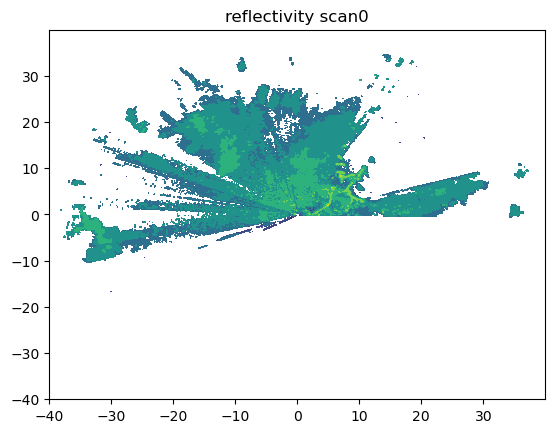

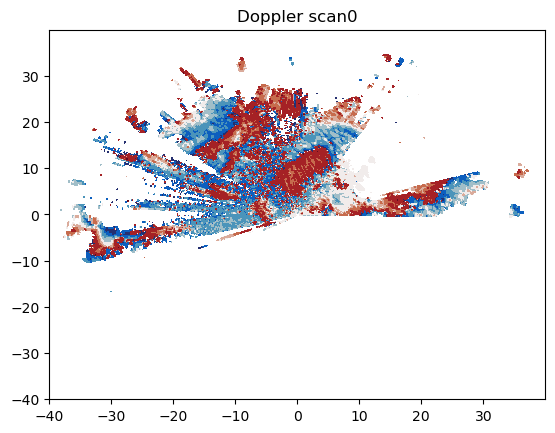

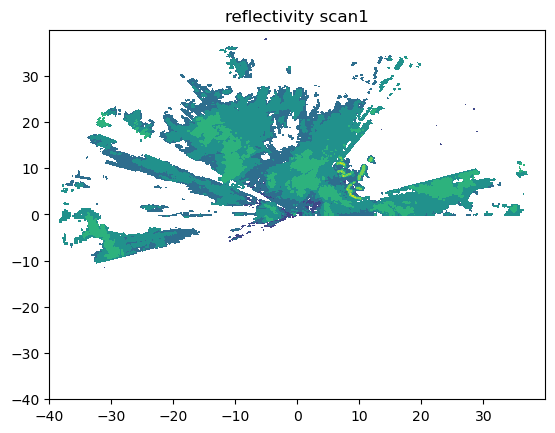

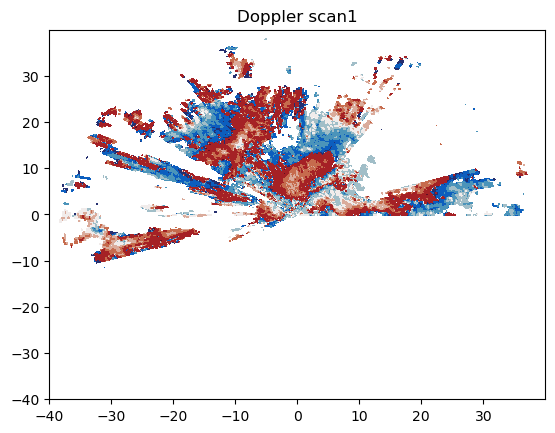

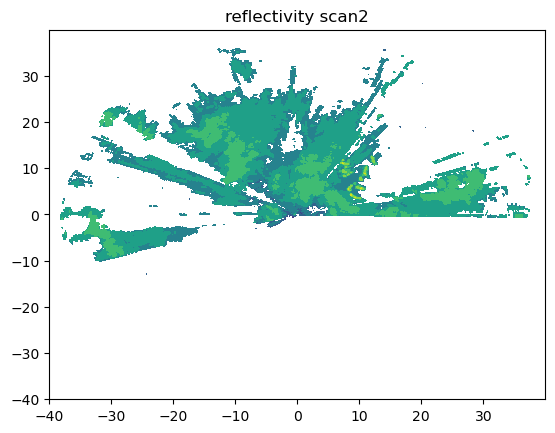

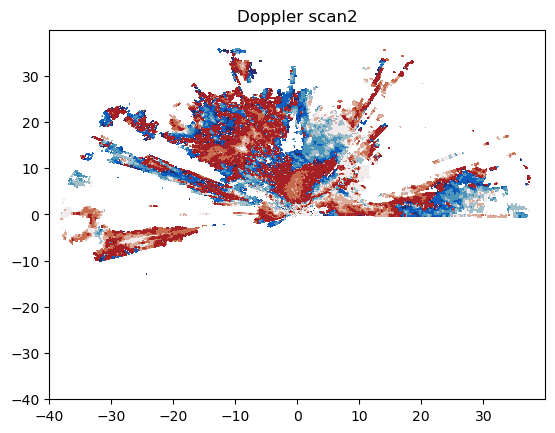

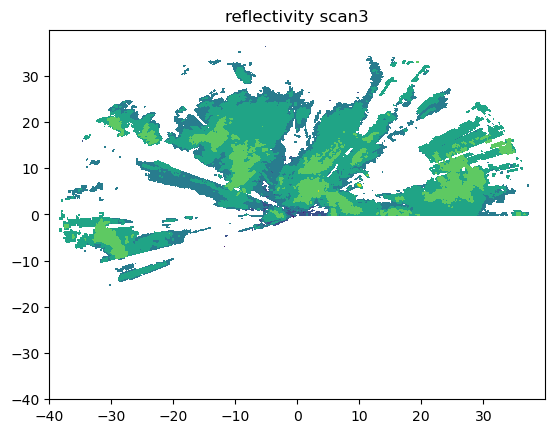

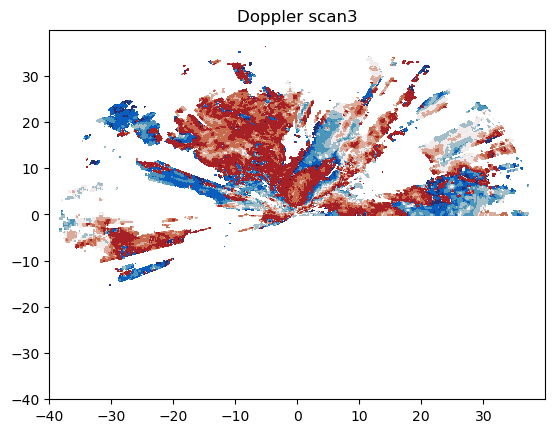

In [70]:
for t in range(4):
    r = np.array(ds.reflectivity[t,:,:])
    d = np.array(ds.mean_doppler_velocity[t,:,:])
    x = np.array(ds.X)/1000
    y = np.array(ds.Y)/1000
    plt.contourf(x,y,r)
    plt.title('reflectivity scan'+str(t))
    plt.show()
    plt.contourf(x,y,d,cmap='pyart_balance')
    plt.title('Doppler scan'+str(t))
    plt.show()